#               FASHION PRODUCTS RECOMMENDER SYSTEM USING CNN

# Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import math
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras import models
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
from skimage import io
from sklearn.model_selection import train_test_split


%matplotlib inline

In [ ]:
DATASET_PATH = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/fashion-dataset/"
styles_data = pd.read_csv(DATASET_PATH + "styles.csv", nrows=40000, error_bad_lines=False)
styles_data.head(10)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


In [ ]:
styles_data['image'] = styles_data.apply(lambda row: str(row['id']) + ".jpg", axis=1)
styles_data.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch,30039.jpg


In [ ]:
df = pd.DataFrame({
    'filename': styles_data['image'],
    'type': styles_data['articleType'],
    'gender':styles_data['gender'],
    'Category': styles_data['masterCategory']
})

# total number of entries in the dataframe
total_images = len(df)
print('total row count: ',total_images)

df.head(10)

total row count:  40000


,filename,type,gender,Category
0,15970.jpg,Shirts,Men,Apparel
1,39386.jpg,Jeans,Men,Apparel
2,59263.jpg,Watches,Women,Accessories
3,21379.jpg,Track Pants,Men,Apparel
4,53759.jpg,Tshirts,Men,Apparel
5,1855.jpg,Tshirts,Men,Apparel
6,30805.jpg,Shirts,Men,Apparel
7,26960.jpg,Shirts,Women,Apparel
8,29114.jpg,Socks,Men,Accessories
9,30039.jpg,Watches,Men,Accessories


In [ ]:
classes = df['type'].unique().tolist()
total_class = len(classes)
print(total_class)
print(classes)
df['class'] = df['type'].apply(lambda x: classes.index(x) if x in classes else 0)
df.head(10)

141
['Shirts', 'Jeans', 'Watches', 'Track Pants', 'Tshirts', 'Socks', 'Casual Shoes', 'Belts', 'Flip Flops', 'Handbags', 'Tops', 'Bra', 'Sandals', 'Shoe Accessories', 'Sweatshirts', 'Deodorant', 'Formal Shoes', 'Bracelet', 'Lipstick', 'Flats', 'Kurtas', 'Waistcoat', 'Sports Shoes', 'Shorts', 'Briefs', 'Sarees', 'Perfume and Body Mist', 'Heels', 'Sunglasses', 'Innerwear Vests', 'Pendant', 'Nail Polish', 'Laptop Bag', 'Scarves', 'Rain Jacket', 'Dresses', 'Night suits', 'Skirts', 'Wallets', 'Blazers', 'Ring', 'Kurta Sets', 'Clutches', 'Shrug', 'Backpacks', 'Caps', 'Trousers', 'Earrings', 'Camisoles', 'Boxers', 'Jewellery Set', 'Dupatta', 'Capris', 'Lip Gloss', 'Bath Robe', 'Mufflers', 'Tunics', 'Jackets', 'Trunk', 'Lounge Pants', 'Face Wash and Cleanser', 'Necklace and Chains', 'Duffel Bag', 'Sports Sandals', 'Foundation and Primer', 'Sweaters', 'Free Gifts', 'Trolley Bag', 'Tracksuits', 'Swimwear', 'Shoe Laces', 'Fragrance Gift Set', 'Bangle', 'Nightdress', 'Ties', 'Baby Dolls', 'Legging

,filename,type,gender,Category,class
0,15970.jpg,Shirts,Men,Apparel,0
1,39386.jpg,Jeans,Men,Apparel,1
2,59263.jpg,Watches,Women,Accessories,2
3,21379.jpg,Track Pants,Men,Apparel,3
4,53759.jpg,Tshirts,Men,Apparel,4
5,1855.jpg,Tshirts,Men,Apparel,4
6,30805.jpg,Shirts,Men,Apparel,0
7,26960.jpg,Shirts,Women,Apparel,0
8,29114.jpg,Socks,Men,Accessories,5
9,30039.jpg,Watches,Men,Accessories,2


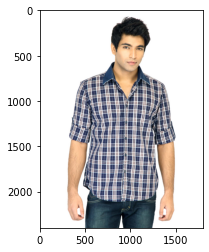

In [ ]:
image_path=DATASET_PATH+"/images/"+df.loc[0,'filename']
image = io.imread(image_path)
plt.imshow(image)

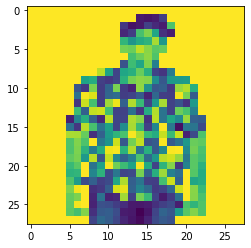

In [ ]:
image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, dsize=(28, 28))
plt.imshow(image)

# Prepare,Train and Test data


In [ ]:
def prepareData(st,sp):
    x = []
    y = []    
    for i in range(st, sp): 
        #print(i)
        image_path=DATASET_PATH+"/images/"+df.loc[i,'filename']
        image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
        try:
            resized_image = cv2.resize(image, dsize=(28, 28))
        except:
            continue
        x.append(resized_image) 
        y_value = df.loc[i,'class']
        y.append(y_value)
                
    return x, y

In [ ]:
X=[]
Y=[]
start = 0
stop = total_images
X,Y=prepareData(start,stop)

In [ ]:
# conversion into numpy array
X = np.array(X).reshape(-1, 28,28,1)
Y = np.array(Y)

# normalizing
X = X/255

# processing Y_train for dimension matching
Y = Y.reshape(len(X),)

# Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 500)
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 500)

In [ ]:
print('Train Image Shape: ',X_train.shape)
print('Train Classes Shape: ',Y_train.shape)
print('Test Image Shape: ',X_test.shape)
print('Test Classes Shape: ',Y_test.shape)
print('Val Image Shape: ',X_validate.shape)
print('Val CLasses Shape: ',Y_validate.shape)

Train Image Shape:  (32396, 28, 28, 1)
Train Classes Shape:  (32396,)
Test Image Shape:  (4000, 28, 28, 1)
Test Classes Shape:  (4000,)
Val Image Shape:  (3600, 28, 28, 1)
Val CLasses Shape:  (3600,)


# CNN Model

## CNN Model with Dropout

In [ ]:
def create_cnn_model_with_dropout():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(units = 512, activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units = total_class, activation = 'softmax'))
    
    return model


In [ ]:
model=create_cnn_model_with_dropout()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [ ]:
def train_cnn_model(model):
    model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])
    history = model.fit(X_train, Y_train, batch_size = 128, epochs = 150, verbose = 1, validation_data = (X_validate, Y_validate))
    return history

In [ ]:
history=train_cnn_model(model)

Epoch 1/150
254/254 [==============================] - 18s 66ms/step - loss: 3.6635 - accuracy: 0.1572 - val_loss: 2.2502 - val_accuracy: 0.3819
Epoch 2/150
254/254 [==============================] - 16s 61ms/step - loss: 2.1634 - accuracy: 0.4025 - val_loss: 1.5824 - val_accuracy: 0.5500
Epoch 3/150
254/254 [==============================] - 16s 63ms/step - loss: 1.6738 - accuracy: 0.5265 - val_loss: 1.3225 - val_accuracy: 0.6161
Epoch 4/150
254/254 [==============================] - 15s 61ms/step - loss: 1.4485 - accuracy: 0.5781 - val_loss: 1.1957 - val_accuracy: 0.6569
Epoch 5/150
254/254 [==============================] - 16s 62ms/step - loss: 1.3373 - accuracy: 0.6119 - val_loss: 1.1259 - val_accuracy: 0.6728
Epoch 6/150
254/254 [==============================] - 15s 61ms/step - loss: 1.2696 - accuracy: 0.6266 - val_loss: 1.0500 - val_accuracy: 0.6917
Epoch 7/150
254/254 [==============================] - 16s 62ms/step - loss: 1.2215 - accuracy: 0.6389 - val_loss: 1.0095 - val_ac

254/254 [==============================] - 15s 61ms/step - loss: 0.6803 - accuracy: 0.7746 - val_loss: 0.7122 - val_accuracy: 0.7761
Epoch 58/150
254/254 [==============================] - 15s 60ms/step - loss: 0.6744 - accuracy: 0.7745 - val_loss: 0.7083 - val_accuracy: 0.7856
Epoch 59/150
254/254 [==============================] - 18s 71ms/step - loss: 0.6891 - accuracy: 0.7721 - val_loss: 0.7024 - val_accuracy: 0.7811
Epoch 60/150
254/254 [==============================] - 16s 64ms/step - loss: 0.6942 - accuracy: 0.7703 - val_loss: 0.6940 - val_accuracy: 0.7844
Epoch 61/150
254/254 [==============================] - 15s 61ms/step - loss: 0.6937 - accuracy: 0.7695 - val_loss: 0.6998 - val_accuracy: 0.7869
Epoch 62/150
254/254 [==============================] - 15s 60ms/step - loss: 0.6824 - accuracy: 0.7700 - val_loss: 0.7031 - val_accuracy: 0.7842
Epoch 63/150
254/254 [==============================] - 16s 61ms/step - loss: 0.6779 - accuracy: 0.7722 - val_loss: 0.7038 - val_accuracy

254/254 [==============================] - 15s 61ms/step - loss: 0.6092 - accuracy: 0.7935 - val_loss: 0.6827 - val_accuracy: 0.7933
Epoch 114/150
254/254 [==============================] - 15s 60ms/step - loss: 0.6067 - accuracy: 0.7940 - val_loss: 0.6957 - val_accuracy: 0.7939
Epoch 115/150
254/254 [==============================] - 16s 61ms/step - loss: 0.6082 - accuracy: 0.7957 - val_loss: 0.6962 - val_accuracy: 0.7969
Epoch 116/150
254/254 [==============================] - 15s 60ms/step - loss: 0.5950 - accuracy: 0.7963 - val_loss: 0.7029 - val_accuracy: 0.7794
Epoch 117/150
254/254 [==============================] - 15s 61ms/step - loss: 0.6007 - accuracy: 0.7980 - val_loss: 0.6943 - val_accuracy: 0.7883
Epoch 118/150
254/254 [==============================] - 15s 60ms/step - loss: 0.5998 - accuracy: 0.7966 - val_loss: 0.6826 - val_accuracy: 0.7933
Epoch 119/150
254/254 [==============================] - 15s 60ms/step - loss: 0.5941 - accuracy: 0.7988 - val_loss: 0.7093 - val_ac

In [ ]:
model.save('DeepFashion.h5')

## Train Accuracy Vs Validation Accuracy

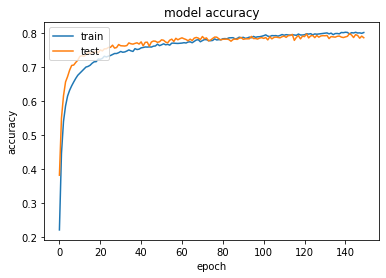

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Train Loss Vs Validation Loss

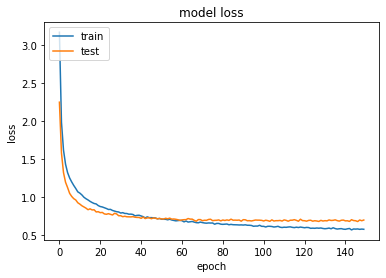

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## CNN Model without Dropout

In [ ]:
'''
def create_sequential_model_wo_dropout():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Flatten())
    model.add(Dense(units = 512, activation = 'relu'))

    model.add(Dense(units = total_class, activation = 'softmax'))
    return model
'''

In [ ]:
#model_wo_dropout=create_sequential_model_wo_dropout()

In [ ]:
#model_wo_dropout.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])
#model_wo_dropout.fit(X_train, Y_train, batch_size = 128, epochs = 100, verbose = 1, validation_data = (X_validate, Y_validate))

In [ ]:
#accuracy_score(Y_pred_wo_dropout)

In [ ]:
#Y_pred_wo_dropout.predict_classes(X_test)

# Load the saved model and pass the Test Data

In [ ]:
model = models.load_model('DeepFashion.h5')

In [ ]:
Y_pred = model.predict_classes(X_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print("Accuracy of the model on test data: ",accuracy_score(Y_pred,Y_test))

Accuracy of the model on test data:  0.8015


# Find the Class of a given Image

In [ ]:
def displayImage(i):
    Image_path=DATASET_PATH+"/images/"+df.loc[i,'filename']
    image = cv2.imread(Image_path,cv2.IMREAD_COLOR)
    resized_img = cv2.resize(image, dsize=(100,100))
    return resized_img

def predictClass(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    resized_img = cv2.resize(img, dsize=(28, 28))
    pixels = np.array(resized_img).reshape(-1, 28,28,1)
    pixels=pixels/255
    result=model.predict(pixels)
    print(np.argmax(result))
    return pixels,classes[np.argmax(result)]

## Display sample image

Text(0.5, 1.0, '59263')

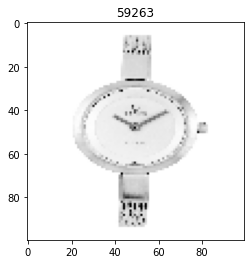

In [ ]:
index=2
sample_id=styles_data.loc[index,'id']
img = displayImage(index)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(sample_id)

## Display the class predicted for the sample image

In [ ]:
sample_image,predicted_class=predictClass(img)
print(predicted_class)

2
Watches


# Find Similar Images

In [ ]:
similar=[]
for i in range(0,len(df)): 
    if(df["type"][i]==predicted_class and df['filename'][i]!=df['filename'][index]):
        similar.append(int(df['filename'][i].replace('.jpg','')))
            
print(len(similar))

2253


## Append all similar products and their IDs into arrays

In [ ]:
similar_images=[]
similar_IDs=[]

for imageID in similar:
    Image_path=DATASET_PATH+"/images/"+str(imageID)+".jpg"
    image = cv2.imread(Image_path,cv2.IMREAD_GRAYSCALE)
    try:
        resized_img = cv2.resize(image, dsize=(28,28))
    except:
        continue
    similar_images.append(resized_img)
    similar_IDs.append(imageID)
        
similar_images = np.array(similar_images).reshape(-1, 28,28,1)
similar_images = similar_images/255

# Calculating Euclidean Distance between two grayscale images

In [ ]:
def calculateDistance(i1, i2):
    return math.sqrt(np.sum((i1-i2)**2))

## Display the sample image

Text(0.5, 1.0, '59263')

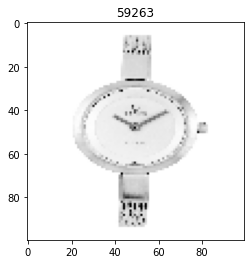

In [ ]:
plt.imshow(img)
plt.title(sample_id)

## Display one of the similar images

Text(0.5, 1.0, '17429')

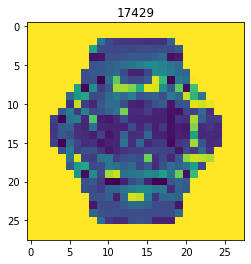

In [ ]:
plt.imshow(similar_images[2])
plt.title(similar_IDs[2])

## Display the Euclidean distance between the sample image and the above similar image

In [ ]:
print("Vector Distance bwteen the sample and the above similar image is: ",calculateDistance(sample_image,similar_images[2]))

Vector Distance bwteen the sample and the above similar image is:  13.151685957386697


# Calculate the Euclidean distance between the sample image and all the similar images

## Get the indices of the best 10 similar images

In [ ]:
distance_list=[]
for i in range (0, len(similar_images)):
    distance_list.append(calculateDistance(sample_image,similar_images[i]))

sorted_distance_list=distance_list.copy()
#print(distance_list)
sorted_distance_list.sort()

best10=sorted_distance_list[0:11]
print(best10)
index_distance=[]
for i in range (0, len(best10)-1):
    if(best10[i]!=best10[i+1]):
        index_distance.append(distance_list.index(best10[i]))
print(index_distance)

[2.6828086988112907, 2.7013147012067638, 2.7033264427754835, 2.7155836322359543, 2.7331926708679215, 2.757858297916687, 2.7680747101410974, 2.796152681686082, 2.799725366879762, 2.8013562925923763, 2.802196095993256]
[697, 953, 1209, 429, 1014, 312, 362, 98, 390, 1150]


# Display the best 10 similar images as recommended products

In [ ]:
final_images=[]

for i in range(0,len(index_distance)):
    print(similar_IDs[i])
    Image_path=DATASET_PATH+"/images/"+str(similar_IDs[index_distance[i]])+".jpg"
    src = cv2.imread(Image_path)
    image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) 
    final_images.append(image)
    

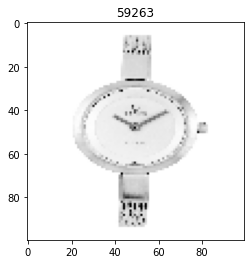

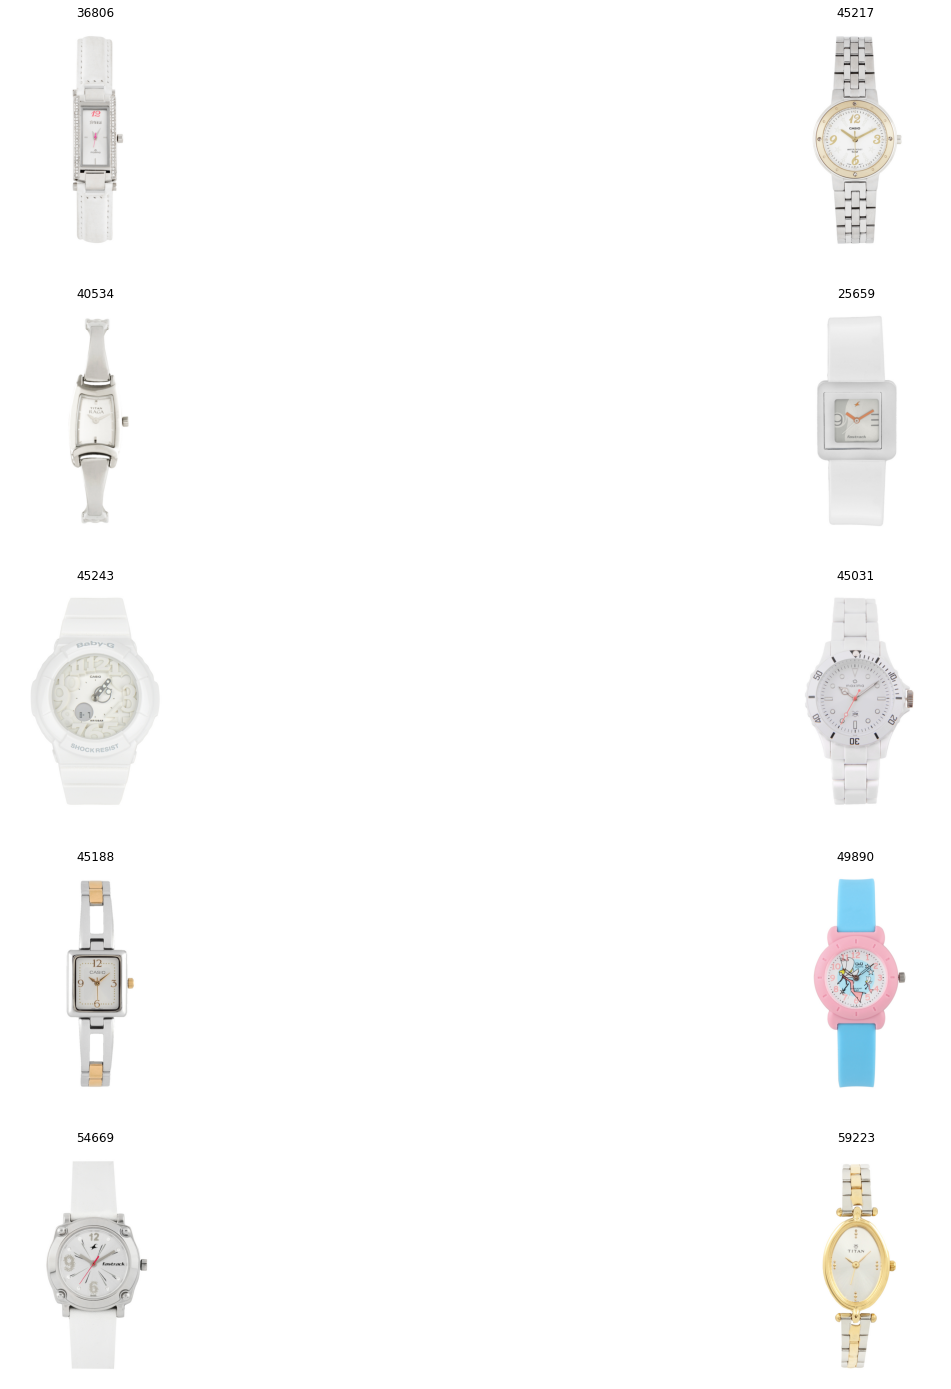

In [ ]:
plt.imshow(img)
plt.title(sample_id)
fig = plt.figure(figsize=(25, 25))
  
rows = 5
columns = 2

for i in range(0,len(final_images)):
    
    fig.add_subplot(rows, columns, i+1)

    plt.imshow(final_images[i])
    plt.title(similar_IDs[index_distance[i]])
    plt.axis('off')